

---



***1. Предварительные манипуляции + загрузка данных**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/DOM/archive (1).zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/DOM/archive (1).zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
filename='housing.csv'

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(filename, header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2




---



**2. Маленький анализ**

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.MEDV.unique

<bound method Series.unique of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64>

In [ ]:
df.iloc[:,:-1].head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

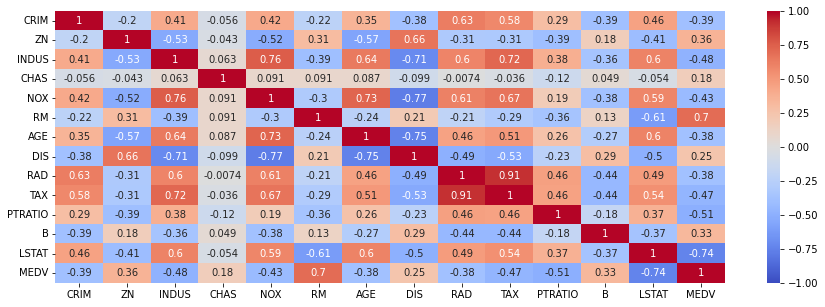

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')



---



**3. Стандартизация факторных признаков**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
array = df.iloc[:,:-1].values
array.shape

(506, 13)

In [ ]:
scaler=StandardScaler().fit(array)
rescaledX=scaler.transform(array)

In [ ]:
rescaledX[0:5,:]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])



---



**4. Обучение**

In [ ]:
import torch

In [ ]:
features = torch.Tensor(rescaledX) # берем стандартизованные признаки
labels = torch.Tensor(df.iloc[:,-1])

In [ ]:
features

tensor([[-0.4198,  0.2848, -1.2879,  ..., -1.4590,  0.4411, -1.0756],
        [-0.4173, -0.4877, -0.5934,  ..., -0.3031,  0.4411, -0.4924],
        [-0.4173, -0.4877, -0.5934,  ..., -0.3031,  0.3964, -1.2087],
        ...,
        [-0.4134, -0.4877,  0.1157,  ...,  1.1765,  0.4411, -0.9830],
        [-0.4078, -0.4877,  0.1157,  ...,  1.1765,  0.4032, -0.8653],
        [-0.4150, -0.4877,  0.1157,  ...,  1.1765,  0.4411, -0.6691]])

In [ ]:
labels[:8]

tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000])

In [ ]:
features.shape, labels.shape

(torch.Size([506, 13]), torch.Size([506]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
batch_size = 10
dataset = TensorDataset(features, labels)
data_iter = DataLoader(dataset, batch_size, shuffle=True)

In [ ]:
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.4043, -0.4877, -1.0340, -0.2726, -0.3861, -1.0153,  0.7085, -0.5699,
         -0.5230, -0.6666, -0.8579,  0.4411,  0.2855],
        [-0.4076, -0.4877,  2.4226, -0.2726,  0.4691, -0.4297,  0.5307, -0.8011,
         -0.6380,  1.7982,  0.7603,  0.4411,  0.0977],
        [-0.2464, -0.4877,  1.2319, -0.2726,  2.7323, -1.2546,  1.1175, -1.0474,
         -0.5230, -0.0311, -1.7364, -0.1653,  0.0879],
        [ 0.1080, -0.4877,  1.0160, -0.2726,  1.8599,  0.1615,  0.6908, -0.6070,
          1.6612,  1.5309,  0.8066,  0.1961, -0.6817],
        [-0.3920, -0.4877, -0.1805, -0.2726, -0.0924, -0.7161,  0.1111,  0.1125,
         -0.6380, -0.6191, -0.0257,  0.4411,  0.4607],
        [ 0.2393, -0.4877,  1.0160,  3.6684,  0.6591,  0.5675,  1.0037, -1.1591,
          1.6612,  1.5309,  0.8066,  0.2046, -1.2508],
        [ 2.4657, -0.4877,  1.0160, -0.2726,  1.1947, -1.3330,  0.9753, -0.9946,
          1.6612,  1.5309,  0.8066,  0.4411,  0.9976],
        [-0.4093,  1.2291, -0.6897, -0.2726, -0.

In [ ]:
model = torch.nn.Sequential(torch.nn.Linear(13, 1))

In [ ]:
model

Sequential(
  (0): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
loss = torch.nn.MSELoss(reduction='mean')

In [ ]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001) #model.parameters() - загружает изменяемые данные requires_grad, lr - шаг ГС

In [ ]:
num_epochs = 1000
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(features).reshape(-1), labels)
    if epoch % 50 == 0:
        print(f'epoch {epoch}, loss: {l.item()}')
#        print('|\tw', model[0].weight.data)
#        print('|\tb', model[0].bias.data)


epoch 50, loss: 22.61162567138672
epoch 100, loss: 22.14278793334961
epoch 150, loss: 22.0045166015625
epoch 200, loss: 21.948810577392578
epoch 250, loss: 21.922319412231445
epoch 300, loss: 21.912321090698242
epoch 350, loss: 21.903663635253906
epoch 400, loss: 21.899415969848633
epoch 450, loss: 21.898757934570312
epoch 500, loss: 21.896774291992188
epoch 550, loss: 21.89657974243164
epoch 600, loss: 21.89609718322754
epoch 650, loss: 21.895421981811523
epoch 700, loss: 21.895639419555664
epoch 750, loss: 21.89531898498535
epoch 800, loss: 21.897302627563477
epoch 850, loss: 21.898801803588867
epoch 900, loss: 21.895164489746094
epoch 950, loss: 21.895244598388672
epoch 1000, loss: 21.89512825012207


In [ ]:
model[0].weight.data

tensor([[-0.9244,  1.0832,  0.1387,  0.6735, -2.0580,  2.6718,  0.0195, -3.1020,
          2.6578, -2.0724, -2.0615,  0.8557, -3.7356]])

In [ ]:
model[0].bias.data

tensor([22.5322])

In [ ]:
for X, y in data_iter:
    print(model(X).reshape(-1))
    break

tensor([27.0924, 27.7649, 17.8648, 19.0392, 20.7545, 17.5243,  8.5367, 32.3902,
        17.8833, 25.5569], grad_fn=<ReshapeAliasBackward0>)
